In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [9]:
import networkx as nx
from graph2plan.fourtp.tests import test_init_rel, test_assign_rel, test_dual_creation


from graph2plan.fourtp.canonical_interfaces import CanonicalOrder
from graph2plan.fourtp.rel import plot_rel, RELVertexData
from graph2plan.dual.helpers import check_is_source_target_graph
from typing import NamedTuple

node: 4 | rp, re: 1->11 | le, lp: 5->3
node: 6 | rp, re: 4->11 | le, lp: 7->5
node: 5 | rp, re: 4->6 | le, lp: 7->3
node: 7 | rp, re: 6->10 | le, lp: 8->3
node: 10 | rp, re: 6->11 | le, lp: 12->9
node: 3 | rp, re: 1->4 | le, lp: 8->2
node: 8 | rp, re: 7->9 | le, lp: 12->2
node: 9 | rp, re: 7->10 | le, lp: 12->8


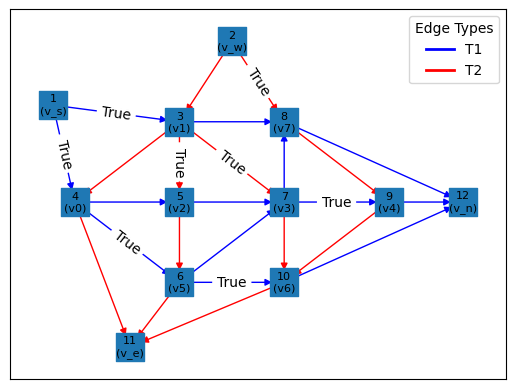

Structure of this embedding is invalid!!!!
Structure of this embedding is invalid!!!!


EmbedResult(embedding=<networkx.algorithms.planarity.PlanarEmbedding object at 0x119a50ad0>, pos={'v5': (1, 1), 'v6': (2, 1), 'v0': (0, 2), 'v2': (1, 2), 'v3': (2, 2), 'v4': (3, 2), 'v1': (1, 3), 'v7': (2, 3), 'v_n': (1.75, 4.074308921936231), 'v_e': (3.726677848998413, 2.0976310729378174), 'v_s': (1.75, 0.12095322393940444), 'v_w': (-0.22667784899841292, 2.0976310729378174)}, directed_edges=[('v0', 'v2'), ('v0', 'v5'), ('v1', 'v7'), ('v2', 'v3'), ('v3', 'v4'), ('v3', 'v7'), ('v4', 'v_n'), ('v5', 'v3'), ('v5', 'v6'), ('v6', 'v_n'), ('v7', 'v_n'), ('v_n', 'v_e'), ('v_s', 'v0'), ('v_s', 'v1'), ('v_s', 'v_e'), ('v_w', 'v_e'), ('v_w', 'v_n'), ('v_w', 'v_s')])

In [11]:
test_dual_creation()

In [3]:
# G, pos, full_pos =  test_four_complete()

In [4]:
# pickle_co()

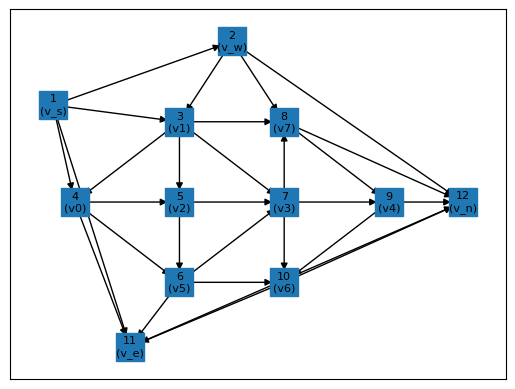

In [ ]:
test_init_rel()

node: 4 | rp, re: 1->11 | le, lp: 5->3
node: 6 | rp, re: 4->11 | le, lp: 7->5
node: 5 | rp, re: 4->6 | le, lp: 7->3
node: 7 | rp, re: 6->10 | le, lp: 8->3
node: 10 | rp, re: 6->11 | le, lp: 12->9
node: 3 | rp, re: 1->4 | le, lp: 8->2
node: 8 | rp, re: 7->9 | le, lp: 12->2
node: 9 | rp, re: 7->10 | le, lp: 12->8


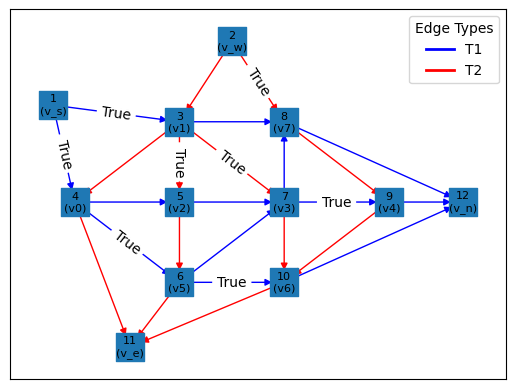

In [8]:
G, T1, T2 = test_assign_rel()

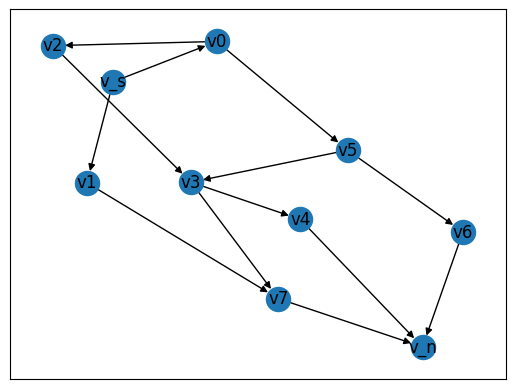

In [4]:
nx.draw_networkx(T1)

In [5]:
check_is_source_target_graph(T1)

('v_s', 'v_n')

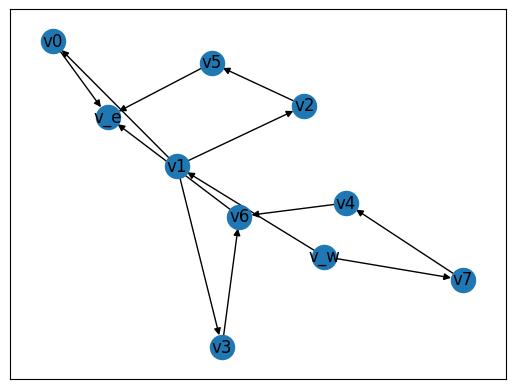

In [6]:
nx.draw_networkx(T2)

In [7]:
check_is_source_target_graph(T2)

('v_w', 'v_e')